<a href="https://colab.research.google.com/github/trong-khanh-1109/CS114.L22.KHCL/blob/main/Colab_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>BÀI TẬP COLAB SỐ 03 - 17/05/2021</b></h1>
<h1 align="center"><b>PREDICT FINAL SCORE OF IT001</b></h1>

###LỚP: CS114.L22.KHCL
###NHÓM:
1. Đỗ Trọng Khánh - *19521676*
2. Võ Phạm Duy Đức - *19521383*
3. Trịnh Công Danh - *19521326*

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_wecode = pd.read_csv('/content/drive/My Drive/21-5-2021/wecode.csv')
data_score_training = pd.read_csv('/content/drive/My Drive/21-5-2021/score_training.csv')
data_wecode.head()

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07


In [ ]:
data_score_training.head()

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05


#Data discovery

## wecode.csv

In [ ]:
#Thông tin về file wecode.csv
data_wecode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             264606 non-null  int64 
 1   assignment_id  264606 non-null  int64 
 2   problem_id     264606 non-null  int64 
 3   user_id        264606 non-null  int64 
 4   is_final       264606 non-null  int64 
 5   status         264605 non-null  object
 6   pre_score      264606 non-null  int64 
 7   coefficient    264606 non-null  object
 8   file_name      264606 non-null  object
 9   language_id    264606 non-null  int64 
 10  created_at     264606 non-null  object
 11  updated_at     264606 non-null  object
dtypes: int64(7), object(5)
memory usage: 24.2+ MB


> **Nhận xét:** Tất cả các cột trong file csv đều đầy đủ dữ liệu không có cột nào chứa giá trị NULL values

In [ ]:
#Tạo một file info_user chứa thông tin thống kê được của mỗi user_id dựa trên file wecode.csv
info_user = data_wecode[["user_id", "id"]].groupby("user_id").count()
#Đếm số lượng id hay là số lượng submissions của mỗi user và đổi tên cột id thành id_count
info_user = info_user.rename(columns = {"id":"id_count"}).reset_index()
info_user

,user_id,id_count
0,1,2
1,4,54
2,5,6
3,6,130
4,7,5
...,...,...
1154,1860,76
1155,1862,12
1156,1864,187
1157,1865,99


In [ ]:
# Tạo file assignment chứa thông tin về user_id và assignment_id
# drop những dòng trùng lặp nhau (giống nhau về cả user_id lẫn assignment_id)
assignment = data_wecode[["user_id", "assignment_id"]].drop_duplicates() 
# Đếm số lượng asignment_id của mỗi user_id để thu thập thông tin số assignment mà mỗi sinh viên tham gia
assignment = assignment.groupby("user_id").count() 
# Đổi tên cột assignment_id thành assignment_count 
assignment = assignment.rename(columns = {"assignment_id":"assignment_count"}).reset_index()
# Nối file user_id và thông tin về số assignment của mỗi sinh viên vừa tìm được ở trên
info_user = pd.concat([info_user, assignment["assignment_count"]], axis=1) 
info_user

,user_id,id_count,assignment_count
0,1,2,1
1,4,54,1
2,5,6,4
3,6,130,4
4,7,5,1
...,...,...,...
1154,1860,76,10
1155,1862,12,2
1156,1864,187,5
1157,1865,99,3


In [ ]:
# Tương tự như ở trên chúng ta sẽ đếm số bài toán(problem) mà mỗi sinh viên tham gia và thêm vào file info_user
problem = data_wecode[["user_id", "problem_id"]].drop_duplicates()
problem = problem.groupby("user_id").count()
problem = problem.rename(columns = {"problem_id":"problem_count"}).reset_index()
info_user = pd.concat([info_user, problem["problem_count"]], axis=1) 
info_user

,user_id,id_count,assignment_count,problem_count
0,1,2,1,2
1,4,54,1,41
2,5,6,4,5
3,6,130,4,88
4,7,5,1,2
...,...,...,...,...
1154,1860,76,10,43
1155,1862,12,2,6
1156,1864,187,5,63
1157,1865,99,3,17


In [ ]:
# Tạo file score chứa thông tin về user_id, assignment_id, problem_id, pre_score
score = data_wecode[["user_id", "assignment_id", "problem_id", "pre_score"]]
# Tính tổng điểm của mỗi user
score = score.groupby(["user_id","assignment_id", "problem_id"]).sum().apply(lambda x: x)
# Tính điểm trung bình của mỗi user(nhóm user và lấy tổng điểm chia cho số lượng problem của tất các assignment mà tất cả user_id tham gia)
score = score.groupby(["user_id"]).mean()
# Đổi tên pre_score thành average_score
score = score.rename(columns = {"pre_score":"average_score"}).reset_index()
# Thêm thông tin về điểm TB vừa tính vào file info_user
info_user = pd.concat([info_user, score["average_score"]], axis=1)
info_user

,user_id,id_count,assignment_count,problem_count,average_score
0,1,2,1,2,5000.000000
1,4,54,1,41,11365.853659
2,5,6,4,5,6000.000000
3,6,130,4,88,10849.853933
4,7,5,1,2,9421.500000
...,...,...,...,...,...
1154,1860,76,10,43,8446.666667
1155,1862,12,2,6,6666.666667
1156,1864,187,5,63,8941.142857
1157,1865,99,3,17,11144.705882


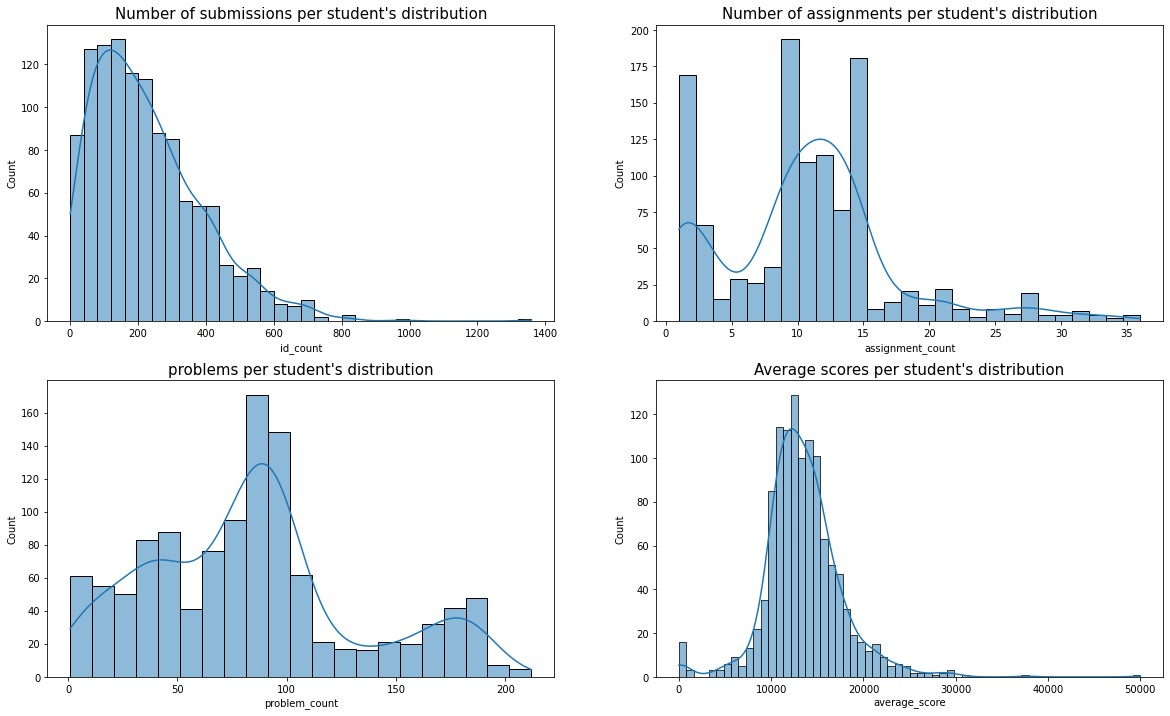

In [ ]:
# Import thư viện cần thiết
import matplotlib.pyplot as plt
import seaborn as sns
#Biểu đồ thống kê tập file info_user
n = 0
column = ["id_count",	"assignment_count",	"problem_count",	"average_score"]
titles = ["submissions","assignments","problems","Average scores"]
fig, axs = plt.subplots(2,2, figsize = (20,12))
for i in range(2):
  for j in range(2):
    if i != 1:
        axs[i,j].set_title("Number of " + titles[n] + " per student's distribution", size=15)
    else:
      axs[i,j].set_title(titles[n]+" per student's distribution", size=15)
    sns.histplot(info_user[column[n]], kde=True, ax=axs[i,j])
    n+=1

> **Nhận xét:**
*   Số lượng submissions của các sinh viên rơi vào khoảng 200 và nhiều nhất với số lượng sinh viên là khoảng 130
*   Số lượng assignments của các sinh viên rơi vào khoảng 10-15 là nhiều nhất với số lượng sinh viên là khoảng 180
*   Số lượng problems của các sinh viên tham gia rơi vào khoảng 90-110 là nhiều nhất với số lượng sinh viên là khảo 180
*   Điểm wecode trung bình của các sinh viên rơi vào khoảng 15000 là nhiều nhất với số lượng sinh viên là khoảng 130

## score_training.csv

In [ ]:
data_score_training.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      975 non-null    int64 
 1   QT      973 non-null    object
 2   GK      974 non-null    object
 3   TH      974 non-null    object
 4   CK      974 non-null    object
 5   TBM     974 non-null    object
 6   TBTL    974 non-null    object
dtypes: int64(1), object(6)
memory usage: 53.4+ KB


>**Nhận xét:** Các cột điểm trong file score_training đều là kiểu string


In [ ]:
data_score_training = data_score_training.dropna().rename(columns={"id":"user_id"})
data_score_training

,user_id,QT,GK,TH,CK,TBM,TBTL
0,22,10.0,9.0,8.5,8.5,8.8,8.52
1,24,10.0,8.0,10.0,9.5,9.4,8.41
2,27,10.0,10.0,10.0,10.0,10.0,8.67
3,28,10.0,9.5,7.5,9.5,9.2,7.39
4,29,10.0,9.5,5.0,8.5,8.2,8.05
...,...,...,...,...,...,...,...
969,1856,5.0,5.5,7.0,7.5,6.7,7.34
970,1857,5.0,4.5,10.0,4.0,6.0,6.03
971,1859,8.0,5.0,10.0,1.5,5.4,5.06
972,1862,5.0,6.5,1.0,7.5,5.1,4.71


In [ ]:
cols=["QT",	"GK",	"TH",	"CK",	"TBM",	"TBTL"]
for col in cols:
  data_score_training[col] = pd.to_numeric(data_score_training[col], errors='coerce') # Chuyển từng cột điểm qua kiểu numeric 
data_score_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 0 to 974
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  785 non-null    int64  
 1   QT       785 non-null    float64
 2   GK       785 non-null    float64
 3   TH       785 non-null    float64
 4   CK       785 non-null    float64
 5   TBM      785 non-null    float64
 6   TBTL     785 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 49.1 KB


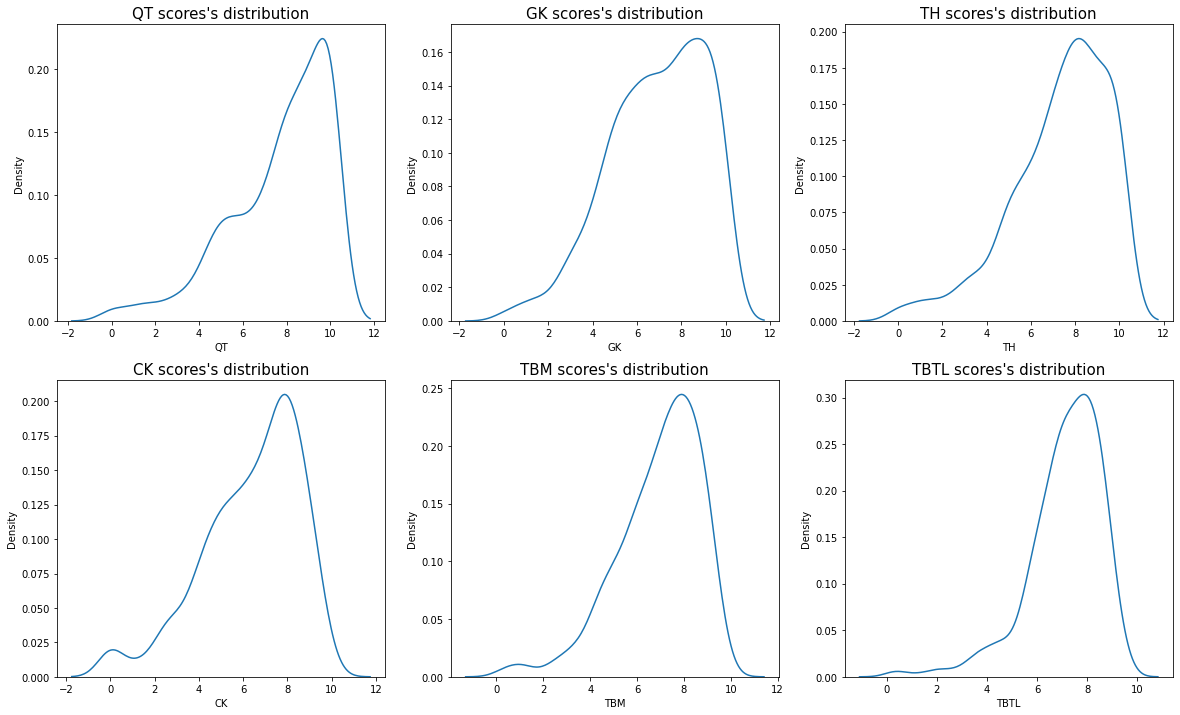

In [ ]:
column = ["id",	"QT",	"GK",	"TH",	"CK",	"TBM",	"TBTL"]
fig, axs = plt.subplots(2, 3, figsize = (20,12))
n = 1
for i in range(2):
  for j in range(3):
      axs[i,j].set_title(column[n] + " scores's distribution", size=15)
      sns.kdeplot(data_score_training[column[n]], ax=axs[i,j])
      n += 1

>**Nhận xét**:
- Điểm QT, GK, TH khá cao, rơi vào khoảng 8 - 10 điểm khá nhiều.
- Điểm TBM thì lại rơi vào khoảng 8 điểm là nhiều nhất do bị ảnh hưởng của điểm thi cuối kì

##**Joining 2 files (user_info and Output)**

In [ ]:

training_data=user_info.merge(data_score_training, on="user_id")
training_data